In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff

In [148]:
path = './data/'
data_raw = arff.loadarff(open(path+'xclara.arff','r'))
data = [[x[0],x[1]] for x in data_raw[0]]

In [149]:
data = np.array(data)
f0 = data[:,0]
f1 = data[:,1]

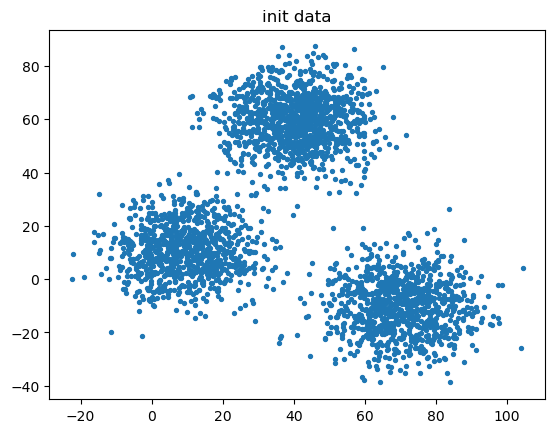

In [150]:
plt.scatter(f0,f1,s=8)
plt.title('init data')
plt.show()

In [151]:
import time
from sklearn import cluster

In [152]:
start_time = time.time()

K = 3
model = cluster.KMeans(n_clusters=K, init='k-means++')
model.fit(data)

finish_time = time.time()
print(f'Fit time : {finish_time - start_time} s')

Fit time : 0.08094930648803711 s


[0 0 0 ... 2 2 2]


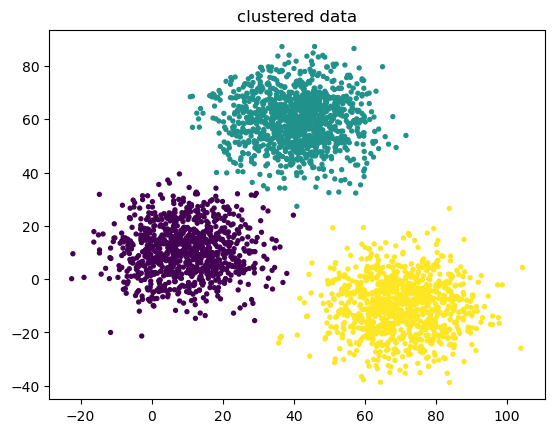

In [153]:
labels = model.labels_
iterations = model.n_iter_
print(labels)

plt.scatter(f0,f1,c=labels,s=8)
plt.title('clustered data')
plt.show()

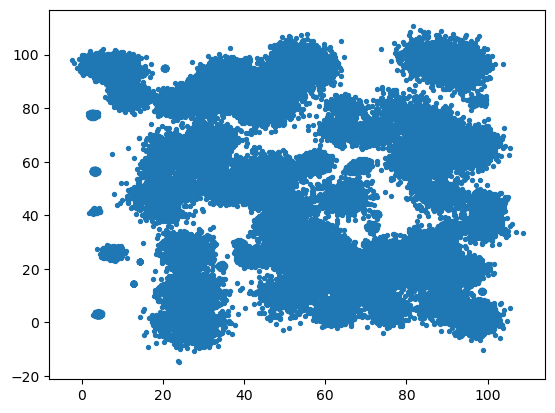

In [154]:
birch_data_raw = arff.loadarff(open(path+'birch-rg3.arff','r'))
birch_data = [[x[0],x[1]] for x in birch_data_raw[0]]
birch_data = np.array(birch_data)
birch_f0 = birch_data[:,0]
birch_f1 = birch_data[:,1]


plt.scatter(birch_f0,birch_f1,s=8)
plt.show()

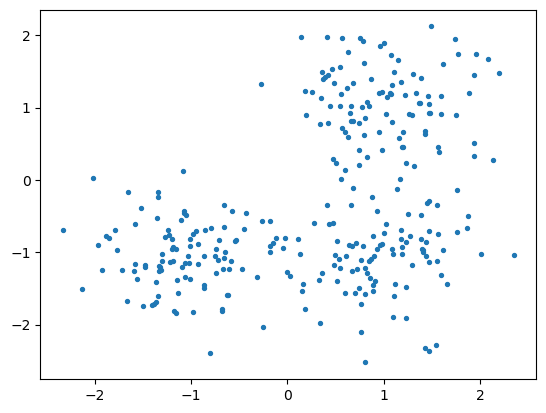

In [155]:
blobs_data_raw = arff.loadarff(open(path+'blobs.arff','r'))
blobs_data = [[x[0],x[1]] for x in blobs_data_raw[0]]
blobs_data = np.array(blobs_data)
blobs_f0 = blobs_data[:,0]
blobs_f1 = blobs_data[:,1]


plt.scatter(blobs_f0,blobs_f1,s=8)
plt.show()

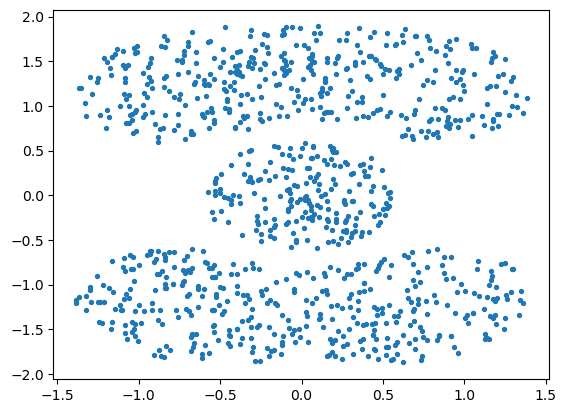

In [156]:
cassini_data_raw = arff.loadarff(open(path+'cassini.arff','r'))
cassini_data = [[x[0],x[1]] for x in cassini_data_raw[0]]
cassini_data = np.array(cassini_data)
cassini_f0 = cassini_data[:,0]
cassini_f1 = cassini_data[:,1]

plt.scatter(cassini_f0,cassini_f1,s=8)
plt.show()

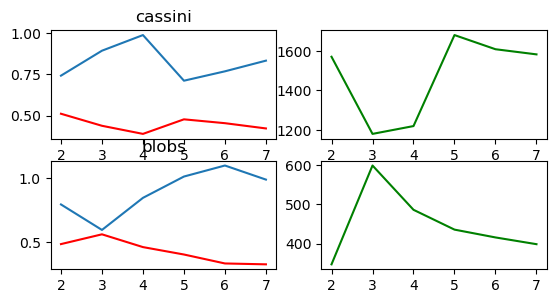

In [157]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score, davies_bouldin_score, calinski_harabasz_score

st = time.time()
blobs_scores = np.empty([6,3])
cassini_scores = np.empty([6,3])
birch_scores = np.empty([6,3])

for k in range(2,8) :
    model = cluster.KMeans(n_clusters=k,init='k-means++')
    model.fit(cassini_data)
    sil = silhouette_score(cassini_data, model.labels_)
    db = davies_bouldin_score(cassini_data, model.labels_)
    ch = calinski_harabasz_score(cassini_data, model.labels_) 

    cassini_scores[k-2] = [sil,db,ch]

plt.subplot(3,2,1)
plt.xticks(np.arange(2,8))
plt.title('cassini')
plt.plot(np.arange(2,8),cassini_scores[:,0],'r')
plt.plot(np.arange(2,8),cassini_scores[:,1])
plt.subplot(3,2,2)
plt.xticks(np.arange(2,8))
plt.plot(np.arange(2,8),cassini_scores[:,2],'g')

for k in range(2,8) :
    model = cluster.KMeans(n_clusters=k,init='k-means++')
    model.fit(blobs_data)
    sil = silhouette_score(blobs_data, model.labels_)
    db = davies_bouldin_score(blobs_data, model.labels_)
    ch = calinski_harabasz_score(blobs_data, model.labels_) 
    
    blobs_scores[k-2] = [sil,db,ch]

plt.subplot(3,2,3)
plt.xticks(np.arange(2,8))
plt.title('blobs')
plt.plot(np.arange(2,8),blobs_scores[:,0],'r')
plt.plot(np.arange(2,8),blobs_scores[:,1])
plt.subplot(3,2,4)
plt.xticks(np.arange(2,8))
plt.plot(np.arange(2,8),blobs_scores[:,2],'g')

plt.show()



In [165]:
import kmedoids
from sklearn import metrics

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances                         

Loss with FasterPAM :  185.68170185178224


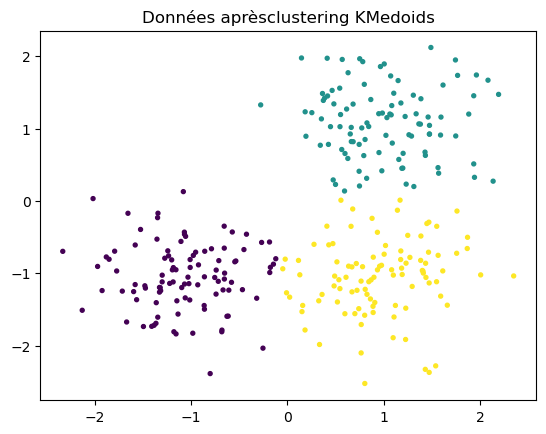

In [166]:
starting_time = time.time()
k=3
distmatrix = euclidean_distances(blobs_data)
fp = kmedoids.fasterpam(distmatrix, k)


final_time = time.time()
iter=fp.n_iter
labels_kmeds = fp.labels
print("Loss with FasterPAM : " , fp.loss)


plt.scatter(blobs_f0, blobs_f1, c = labels_kmeds, s=8)
plt.title("Données après clustering KMedoids")
plt.show()


In [167]:
silhouette_score(blobs_data, labels_kmeds)

0.5585986465111633

[0.4702186656580182, 0.5585986465111633, 0.4683126194960531, 0.3590505673621283, 0.32148719806193604, 0.32683471419873517]


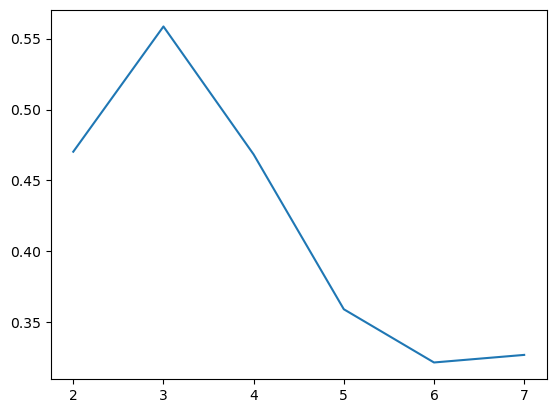

In [170]:
scores = []
for k in range(2,8) :
    model = kmedoids.fasterpam(distmatrix, k)
    labels = model.labels
    scores.append(silhouette_score(blobs_data, labels))

print(scores)
plt.plot(np.arange(2,8),scores)
plt.show()

    